# Induktivitet premosnice (eng. _strap_)

Induktivitet premosnice se računa kao (Ott pp. 136),

$L = 0.002l\left[ 2.303\log{(\frac{2l}{w+t})}+0.5+0.235(\frac{w+t}{l}) \right]~\mathrm{[H/m]}$.

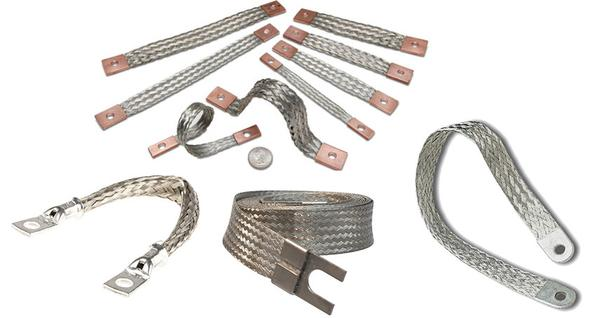



In [27]:
def L_strap(w_m,t_m,l_m):    
    # Ott pp. 136
    w_cm = w_m*100
    t_cm = t_m*100
    l_cm = l_m*100
    L = 0.002*l_cm*(2.303*np.log10(2*l_cm/(w_cm+t_cm))+0.5+0.235*((w_cm+t_cm)/l_cm))    
    return L/1e6

In [34]:
%matplotlib inline
import numpy as np
from ipywidgets import widgets
import matplotlib.pyplot as plt

style = {'description_width': '150px'}
ymin = widgets.FloatLogSlider(min=-9,max=-5, step=1, value=1e-9,description='plot $y_{min}$:',readout_format='.2e',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
ymax = widgets.FloatLogSlider(min=-8,max=-4, step=1, value=1e-7,description='plot $y_{max}$:',readout_format='.2e',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)

w = widgets.FloatSlider(value=10,min=1,max=100,step=1,description='width [mm]:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)
t = widgets.FloatSlider(value=1,min=0.1,max=5.0,step=0.1,description='thickness [mm]:',readout_format='.1f',style=style,layout=widgets.Layout(width='75%'), continuous_update=False)

rb = widgets.RadioButtons(options=['length [mm]'], description='sweep var.',disabled=False)
tnov = widgets.Text(value='100',placeholder='',description='no. of values:',style=style,layout=widgets.Layout(width='65%'), continuous_update=False)
tmin = widgets.Text(value='10',placeholder='',description='min. sweep:',style=style,layout=widgets.Layout(width='65%'), continuous_update=False)
tmax = widgets.Text(value='100',placeholder='',description='max. sweep:',style=style,layout=widgets.Layout(width='65%'), continuous_update=False)

def f(ymin, ymax, w, t, rb, tnov, tmin, tmax):        

    if (int(tnov) > 1) and (float(tmax) > float(tmin)):
        no_lines = int(tnov)    
        if rb == 'length [mm]':            
            l = np.linspace(float(tmin), float(tmax), num=int(tnov))              
        
        fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
        plt.rcParams.update({'font.size': 18})  
        axes = plt.gca()    

        axes.set_xscale("linear")
        axes.set_yscale("linear")   
        plt.sca(axes) 
        plt.xlabel('$w/l$')
        plt.ylabel('Inducance [H]')        
        WoverL = w/l

        w_m = np.full((1, no_lines), w/1000).flatten()
        t_m = np.full((1, no_lines), t/1000).flatten()
        l_m = l/1000
        
        L = L_strap(w_m,t_m,l_m)

        axes.plot(WoverL, L, linestyle='-', color='b')                       

        plt.sca(axes) 
        plt.grid(axis='both')               
        plt.ylim(ymin = ymin, ymax = ymax)                      

        lines = axes.get_lines()
        legend1 = plt.legend([lines[i] for i in [0]], ["$L_{strap}$"], loc=1)           
                
out = widgets.interactive_output(f, 
                                 {'ymin': ymin, 'ymax': ymax,  
                                  'w': w, 't': t, 'rb': rb, 
                                  'tnov': tnov, 'tmin': tmin, 'tmax': tmax})

tab1 = widgets.VBox(children=[ymin, ymax])
tab2 = widgets.VBox(children=[w,t,widgets.HBox(children=[rb,widgets.VBox(children=[tnov,tmin,tmax])])])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'parameters')

widgets.VBox([tab, out])